# CASTEP DNA benchmark performance

This notebook compares the performance of the large DNA benchmark across different HPC facilities.

We compute the mean time per SCF cycle from all cycles in the output file apart from the fastest and slowest cycle times. Performance is plotted as SCF cycles per second.

## Setup section

Import the required modules and define useful functions.

In [15]:
import matplotlib as mpl
import numpy as np
import pandas as pd
from scipy import interpolate
from matplotlib import pyplot as plt
%matplotlib inline
mpl.rcParams['figure.figsize'] = (12,6)
import seaborn as sns
sns.set(font_scale=1.5, context="paper", style="white", font="serif")
pal = sns.color_palette()
cols = pal.as_hex()

In [16]:
import sys
sys.path.append('../../../python-modules')

In [17]:
from utilities import filemanip, sysinfo
from appanalysis import castep

plotcores = True
unitlabel = "Nodes"
if plotcores:
    unitlabel = "Cores"

In [18]:
sysdetails = sysinfo.getdetails('../../../systems.yaml')

../../../python-modules/utilities/sysinfo.py:6: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  systems = yaml.load(input)


## Read performance from output files and compute performance

In [19]:
systems = ['ARCHER','ARCHER2','Cirrus']
perf = {}
notes = {}
names = {}
nodes = {}
perf_max = {}
cpn = {}

for system in systems:
    wdir = '../DNA/results/' + system
    filelist = filemanip.get_filelist(wdir, 'polyA20-no-wat')
    sysdict = sysdetails[system]
    names[system] = sysdict['Name']
    cpn[system] = sysdict['PCores']*sysdict['PPerNode']
    print('\n============================================================')
    print(sysdict['Name'])
    castep_df = pd.DataFrame(castep.create_df_list(filelist, sysdict['PCores']*sysdict['PPerNode']))
    nodes[system], perf_max[system] = castep.get_perf_stats(castep_df, 'max', writestats=True, plot_cores=plotcores)
    print('\n============================================================')


ARCHER
                             Perf                               Count
                              min    median       max      mean   sum
Nodes Processes Threads                                              
128   1536      2        0.001214  0.001214  0.001214  0.001214     1
256   3072      2        0.002603  0.002603  0.002603  0.002603     1
      6144      1        0.002574  0.002574  0.002574  0.002574     1
512   6144      2        0.003797  0.003797  0.003797  0.003797     1
      12288     1        0.004277  0.004277  0.004277  0.004277     1
1024  12288     2        0.006402  0.006402  0.006402  0.006402     1
      24576     1        0.006967  0.007034  0.007102  0.007034     2
2048  24576     2        0.010563  0.010563  0.010563  0.010563     1
                 Perf                               Count
                  min    median       max      mean   sum
Cores Nodes                                              
3072  128    0.001214  0.001214  0.001214  0.001

In [20]:
csd3cpn = 32
csd3nodes_1t = [16,32,64,128,192,256]
csd3scf_1t = [902.97,734.15,545.03,250.38,253.43,404.16]
csd3perf_1t = [1/x for x in csd3scf_1t]

print("1 Thread:")
print("{:>15s} {:>15s} {:>15s} {:>26s}".format('Nodes', 'Cores', 'Mean SCF (s)', 'Performance (SCF cycles/s)'))
print("{:>15s} {:>15s} {:>15s} {:>26s}".format('=====', '=====', '============', '=========================='))
for i, numnodes in enumerate(csd3nodes_1t):
    print("{:>15d} {:>15d} {:>15.1f} {:>26.6f}".format(numnodes, numnodes*csd3cpn, csd3scf_1t[i], csd3perf_1t[i]))

1 Thread:
          Nodes           Cores    Mean SCF (s) Performance (SCF cycles/s)
          =====           =====    ============ ==========================
             16             512           903.0                   0.001107
             32            1024           734.1                   0.001362
             64            2048           545.0                   0.001835
            128            4096           250.4                   0.003994
            192            6144           253.4                   0.003946
            256            8192           404.2                   0.002474


## Performance Comparison

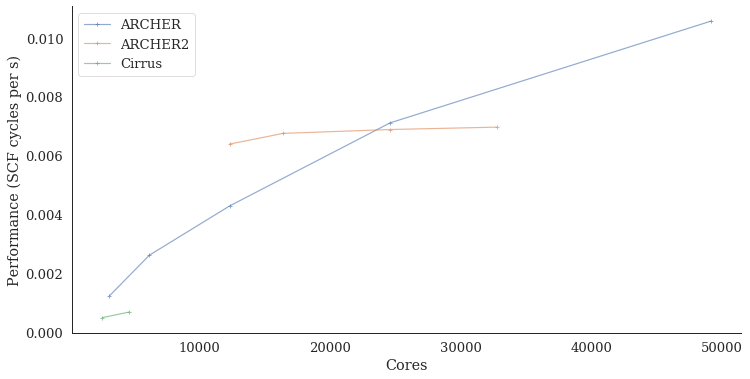

In [21]:
for system in systems:
    plt.plot(nodes[system], perf_max[system], '-+', label=names[system], alpha=0.6)
plt.xlabel(unitlabel)
plt.ylabel('Performance (SCF cycles per s)')
plt.legend(loc='best')
sns.despine()